In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
df = pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [14]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [15]:
df = df[["race","age","gender","metformin","insulin","diabetesMed"]]
df

,race,age,gender,metformin,insulin,diabetesMed
0,Caucasian,[0-10),Female,No,No,No
1,Caucasian,[10-20),Female,No,Up,Yes
2,AfricanAmerican,[20-30),Female,No,No,Yes
3,Caucasian,[30-40),Male,No,Up,Yes
4,Caucasian,[40-50),Male,No,Steady,Yes
...,...,...,...,...,...,...
101761,AfricanAmerican,[70-80),Male,Steady,Down,Yes
101762,AfricanAmerican,[80-90),Female,No,Steady,Yes
101763,Caucasian,[70-80),Male,Steady,Down,Yes
101764,Caucasian,[80-90),Female,No,Up,Yes


In [16]:
for column in df:
  unique_values = df[column].unique() 
  print(f'Unique values in column {column}: {unique_values}')

Unique values in column race: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
Unique values in column age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
Unique values in column gender: ['Female' 'Male' 'Unknown/Invalid']
Unique values in column metformin: ['No' 'Steady' 'Up' 'Down']
Unique values in column insulin: ['No' 'Up' 'Steady' 'Down']
Unique values in column diabetesMed: ['No' 'Yes']


In [17]:
df['age'] = df['age'].replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)','[70-80)', '[80-90)', '[90-100)'], ['5','15','25','35','45','55','65','75','85','95'])
df

<ipython-input-17-c90100f40918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].replace(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)','[70-80)', '[80-90)', '[90-100)'], ['5','15','25','35','45','55','65','75','85','95'])


,race,age,gender,metformin,insulin,diabetesMed
0,Caucasian,5,Female,No,No,No
1,Caucasian,15,Female,No,Up,Yes
2,AfricanAmerican,25,Female,No,No,Yes
3,Caucasian,35,Male,No,Up,Yes
4,Caucasian,45,Male,No,Steady,Yes
...,...,...,...,...,...,...
101761,AfricanAmerican,75,Male,Steady,Down,Yes
101762,AfricanAmerican,85,Female,No,Steady,Yes
101763,Caucasian,75,Male,Steady,Down,Yes
101764,Caucasian,85,Female,No,Up,Yes


In [18]:
df = df[~df['race'].isin(['?'])]
df = df[~df['gender'].isin(['Unknown/Invalid'])]
df = df[~df['age'].isin(['NaN'])]

In [19]:
df

,race,age,gender,metformin,insulin,diabetesMed
0,Caucasian,5,Female,No,No,No
1,Caucasian,15,Female,No,Up,Yes
2,AfricanAmerican,25,Female,No,No,Yes
3,Caucasian,35,Male,No,Up,Yes
4,Caucasian,45,Male,No,Steady,Yes
...,...,...,...,...,...,...
101761,AfricanAmerican,75,Male,Steady,Down,Yes
101762,AfricanAmerican,85,Female,No,Steady,Yes
101763,Caucasian,75,Male,Steady,Down,Yes
101764,Caucasian,85,Female,No,Up,Yes


In [20]:
race = LabelEncoder()
df['race'] = race.fit_transform(df['race'])

gender = LabelEncoder()
df['gender'] = gender.fit_transform(df['gender'])

metformin = LabelEncoder()
df['metformin'] = metformin.fit_transform(df['metformin'])

insulin = LabelEncoder()
df['insulin'] = insulin.fit_transform(df['insulin'])

diabetesMed = LabelEncoder()
df['diabetesMed'] = diabetesMed.fit_transform(df['diabetesMed'])

df

,race,age,gender,metformin,insulin,diabetesMed
0,2,5,0,1,1,0
1,2,15,0,1,3,1
2,0,25,0,1,1,1
3,2,35,1,1,3,1
4,2,45,1,1,2,1
...,...,...,...,...,...,...
101761,0,75,1,2,0,1
101762,0,85,0,1,2,1
101763,2,75,1,2,0,1
101764,2,85,0,1,3,1


In [21]:
X = df.iloc[:, 0:5].values 
Y = df.iloc[:, -1].values 
print(X[3]) 
print(Y[3])

[2 '35' 1 1 3]
1


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [24]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [25]:
Y_pred = gb.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1 score:', f1_score(Y_test, Y_pred))

Accuracy: 0.8633097140559827
Precision: 1.0
Recall: 0.8219079421200812
F1 score: 0.9022496945302955


<Axes: >

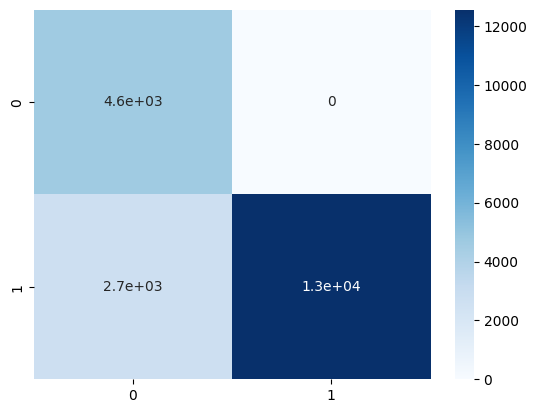

In [26]:
conf = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf, annot=True, cmap='Blues')